<a href="https://colab.research.google.com/github/crd3cc04/DSUnit1_DataWrangling-Storytelling/blob/master/Copy_of_DS_Unit_1_Sprint_Challenge_1_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 1 - Load and Explore the Data

Run the cell below to load the datasets into three dataframes and then follow the instructions below


In [ ]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

geo_country_codes = geo_country_codes[['geo','country']]

In [ ]:
cell_phones.head()

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


In [ ]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [ ]:
geo_country_codes.head()

,geo,country
0,abkh,Abkhazia
1,abw,Aruba
2,afg,Afghanistan
3,ago,Angola
4,aia,Anguilla


Check for missing/null values in the three dataframes

In [ ]:
# Your Work Here
cell_phones.head().isnull().sum()

geo                  0
time                 0
cell_phones_total    0
dtype: int64

In [ ]:
population.head().isnull().sum()

geo                 0
time                0
population_total    0
dtype: int64

In [ ]:
geo_country_codes.head().isnull().sum()

geo        0
country    0
dtype: int64

Make a scatter plot from the `cell_phones` dataframe plotting "time" against "cell_phones_total"

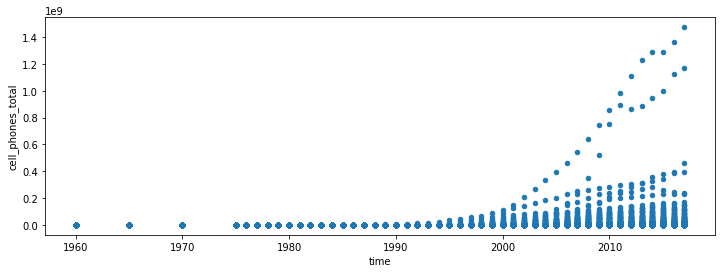

In [ ]:
# Your Work Here
cell_phones.plot(kind='scatter', x='time', y='cell_phones_total', figsize=(12,4));

### Part 2 - Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [ ]:
# Your Work Here
print(cell_phones.columns)
print(population.columns)

Index(['geo', 'time', 'cell_phones_total'], dtype='object')
Index(['geo', 'time', 'population_total'], dtype='object')


In [ ]:
print(cell_phones.shape)
print(population.shape)

(9215, 3)
(59297, 3)


In [ ]:
merged = pd.merge(cell_phones, population, on=('geo', 'time'), how='inner')

In [ ]:
print(merged.shape)

(8590, 4)


Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [ ]:
# Your Work Here
final = pd.merge(merged, geo_country_codes[['geo', 'country']], how='inner', on='geo')
final

,geo,time,cell_phones_total,population_total,country
0,afg,1960,0.0,8996351,Afghanistan
1,afg,1965,0.0,9938414,Afghanistan
2,afg,1970,0.0,11126123,Afghanistan
3,afg,1975,0.0,12590286,Afghanistan
4,afg,1976,0.0,12840299,Afghanistan
...,...,...,...,...,...
8585,zwe,2013,13633167.0,15054506,Zimbabwe
8586,zwe,2014,11798652.0,15411675,Zimbabwe
8587,zwe,2015,12757410.0,15777451,Zimbabwe
8588,zwe,2016,12878926.0,16150362,Zimbabwe


### Part 3 - Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [ ]:
cell_counts=cell_phones['cell_phones_total'].value_counts().sort_index()

In [ ]:
final['cell_counts']=final['cell_phones_total']
final.columns

Index(['geo', 'time', 'cell_phones_total', 'population_total', 'country',
       'cell_counts'],
      dtype='object')

### Part 4 - Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [ ]:
# Your Work Here
final.describe()

,time,cell_phones_total,population_total,cell_counts
count,8590.000000,8.590000e+03,8.590000e+03,8.590000e+03
mean,1994.193481,9.004950e+06,2.983823e+07,9.004950e+06
std,14.257975,5.573408e+07,1.161284e+08,5.573408e+07
min,1960.000000,0.000000e+00,4.433000e+03,0.000000e+00
25%,1983.000000,0.000000e+00,1.456148e+06,0.000000e+00
50%,1995.000000,6.200000e+03,5.725062e+06,6.200000e+03
75%,2006.000000,1.697652e+06,1.810581e+07,1.697652e+06
max,2017.000000,1.474097e+09,1.409517e+09,1.474097e+09


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |


In [ ]:
# Your Work Here
columns = ['geo', 'cell_phones_total']

## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:

- You can make a crosstab. 
- You're going to want occupations as the column indexes and years as the row indexes
- Use the `normalize` parameter to get percentages by year.

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

In [ ]:
# Your Work Here
df.tail(100)

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
2593,2015,former president,1/12/15,Politician,Jimmy Carter,Government and Politics
2594,2015,United States Senator,1/13/15,Politician,Marco Rubio,Government and Politics
2595,2015,actress,1/14/15,Acting,Julianne Moore,"Acting, Comedy & Music"
2596,2015,actress,1/15/15,Acting,Sienna Miller,"Acting, Comedy & Music"
2597,2015,Former Governor of Arkansas,1/19/15,Politician,Mike Huckabee,Government and Politics
...,...,...,...,...,...,...
2688,2015,biographer,7/29/15,Media,Doris Kearns Goodwin,Media
2689,2015,director,7/30/15,Media,J. J. Abrams,Media
2690,2015,stand-up comedian,8/3/15,Comedy,Amy Schumer,"Acting, Comedy & Music"
2691,2015,actor,8/4/15,Acting,Denis Leary,"Acting, Comedy & Music"


In [ ]:
guests = pd.crosstab(df['Year'], df['Occupation'],  normalize='index')*100
guests

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,90.361446,1.204819,6.626506,1.807229
2000,73.964497,8.284024,12.426036,5.325444
2001,72.611465,3.821656,19.745223,3.821656
2002,62.264151,6.918239,26.415094,4.402516
2003,56.024096,10.240964,24.698795,9.036145
2004,38.414634,22.560976,27.439024,11.585366
2005,37.037037,16.049383,33.333333,13.580247
2006,36.024845,19.254658,29.192547,15.527950
2007,25.531915,17.021277,33.333333,24.113475


### Part 2 — Recreate this explanatory visualization:



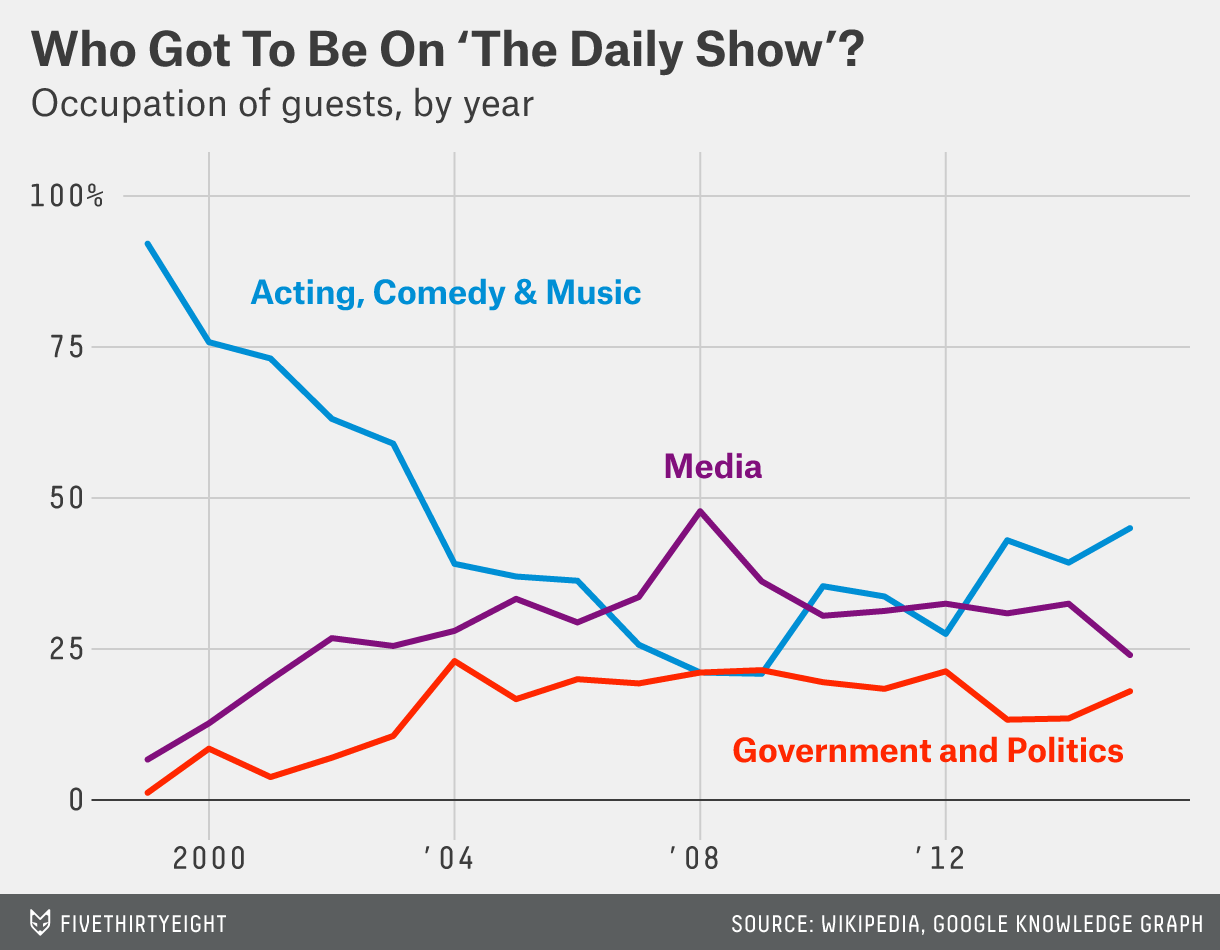

In [ ]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend **or** labels for the lines. (But **you don't need each label positioned next to its line or colored like 538.**)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

In [ ]:
# Your Work Here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
import numpy as np

In [ ]:
guests = pd.crosstab(df['Year'], df['Occupation'],  normalize='index')*100
guests

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,90.361446,1.204819,6.626506,1.807229
2000,73.964497,8.284024,12.426036,5.325444
2001,72.611465,3.821656,19.745223,3.821656
2002,62.264151,6.918239,26.415094,4.402516
2003,56.024096,10.240964,24.698795,9.036145
2004,38.414634,22.560976,27.439024,11.585366
2005,37.037037,16.049383,33.333333,13.580247
2006,36.024845,19.254658,29.192547,15.527950
2007,25.531915,17.021277,33.333333,24.113475


In [ ]:
guests = guests.drop(columns=['Other'])

In [ ]:
year = guests.index.tolist()

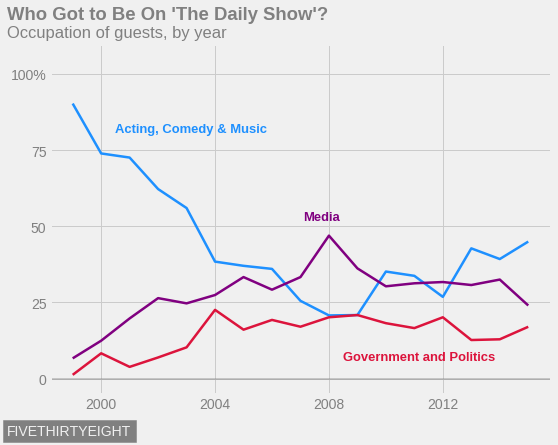

In [ ]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(8,6))

ax1 = sns.lineplot(x=year, y=guests['Acting, Comedy & Music'].tolist(), color='dodgerblue', lw=2.5)
ax1 = sns.lineplot(x=year, y=guests['Government and Politics'].tolist(), color='crimson', lw=2.5)
ax1 = sns.lineplot(x=year, y=guests['Media'].tolist(), color='purple', lw=2.5)
plt.ylim(-5,110)
ax1.axhline(y=0, color='grey', linewidth=1.5, alpha=.5);

# Y   labeling
ax.set_yticks([0, 25, 50, 75, 100])
ax.set_yticklabels(labels=['0', '25', '50', '75', '100%'], fontsize=14, color='grey')

# X labeling and changing label name
ax.set_xticks([2000, 2004, 2008, 2012])
ax.set_xticklabels(['2000', '2004', '2008', '2012'], fontsize=14, color='grey');

# Adding Title
ax.text(x=1996.7, y=118, s="Who Got to Be On 'The Daily Show'?", fontsize=18.5, fontweight='semibold', color='grey')

# Adding the subtitle
ax.text(x=1996.7, y=112, s='Occupation of guests, by year', fontsize=16.5, color='grey');

# Adding Text on plot lines
ax.text(x=2000.5, y=81, s="Acting, Comedy & Music", fontsize=13, fontweight='semibold', color='dodgerblue')
ax.text(x=2008.5, y=6, s="Government and Politics", fontsize=13, fontweight='semibold', color='crimson')
ax.text(x=2007.1, y=52, s="Media", fontsize=13, fontweight='semibold', color='purple');

# Adding signature line 
ax1.text(x=1996.7, y= -18.5,
         s = 'FIVETHIRTYEIGHT',
         fontsize = 14, color = '#f0f0f0', backgroundcolor='grey');
      

Don't know what happened with the bottom part, but I kind of got it.

## How to get a 3 on this Sprint Challenge:

Once you have completed the above making a solid attempt at each section, if you still have time remaining, you can go back and do any of the following to get a score of 3 on the above sections. Remember that everything in this section is **optional** and that we will average your scores between the different sections, so get the easy points first!

Complete any of the following **within** their corresponding sections in the Sprint Challenge (go back up and add these thigns):

### Data Wrangling Section 1

Filter the `cell_phones` dataframe to only include information about the USA and China and then remake the scatterplot. 

### Data Wrangling Section 2

Explain why we are using an "inner" join when we merge these dataframes. 

### Data Wrangling Section 3

Modify the geo column to make the geo codes uppercase instead of lowercase.

### Data Wrangling Section 4

2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

### Data Storytelling 

Keep on working on your graph to make it look particularly like the 538 graph by manipulating the graph's background color, the line colors, the x and y axis tick marks/labels, and adding a subtitle. 

If you have already completed everything else, take this as far as you can within the time limit.
